<a href="https://colab.research.google.com/github/PiotrMaciejKowalski/BigData2024Project/blob/refactoring-sprint2/colabs/BigMess_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/PiotrMaciejKowalski/BigData2024Project.git
%cd BigData2024Project
!git checkout refactoring-sprint2
%cd ..

Cloning into 'BigData2024Project'...
remote: Enumerating objects: 1373, done.
remote: Counting objects: 100% (719/719), done.
remote: Compressing objects: 100% (386/386), done.
remote: Total 1373 (delta 472), reused 496 (delta 324), pack-reused 654
Receiving objects: 100% (1373/1373), 54.39 MiB | 15.97 MiB/s, done.
Resolving deltas: 100% (735/735), done.
/content/BigData2024Project
Branch 'refactoring-sprint2' set up to track remote branch 'refactoring-sprint2' from 'origin'.
Switched to a new branch 'refactoring-sprint2'
/content


In [3]:
!chmod 755 /content/BigData2024Project/src/setup.sh
!/content/BigData2024Project/src/setup.sh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.8/453.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.6/306.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 32.8 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 4.1.0
    Uninstalling platformdirs-4.1.0:
      Successfully uninstalled platformdirs-4.1.0
  Attempting uninstall: keyring
    Found existing installation: keyring 23.5.0
    Uninstall

In [4]:
import sys
sys.path.append('/content/BigData2024Project/src')

In [5]:
from start_spark import initialize_spark
initialize_spark()

# Creating simple ML model

In [24]:
!pip install imblearn

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

from pyspark.sql import SparkSession

from big_mess.loaders import preprocessed_loader


In [7]:
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [8]:
data=preprocessed_loader(spark,'/content/drive/MyDrive/BigMess/NASA/NASA_anotated_preprocessed.csv')

In [9]:
data.show()

+---------+-------+--------+--------+--------+--------+-------------+----------+--------+---------+---------------+--------------+----+-----+--------+----+
|      lon|    lat|   Rainf|    Evap|AvgSurfT|  Albedo|SoilT_10_40cm|      GVEG| PotEvap|RootMoist|SoilM_100_200cm|SoilT_40_100cm|Year|Month|pustynia|step|
+---------+-------+--------+--------+--------+--------+-------------+----------+--------+---------+---------------+--------------+----+-----+--------+----+
|-112.0625|25.4375|   1.403|11.82041|287.8039|41.51882|     289.0886| 0.1682641|131.0754| 425.6864|       224.6146|          NULL|2023|    1|       1|   0|
|-109.0625|25.6875|  1.4716|14.04781|287.6204|30.31183|     289.3364| 0.4438815|  136.33|  99.6714|       198.1852|          NULL|2023|    1|       1|   0|
|-102.1875|26.3125|     0.0|3.987099| 279.181|41.64651|     280.7906| 0.1470791|148.4581| 157.0257|       174.5081|          NULL|2023|    1|       1|   0|
| -98.6875|26.4375|  0.1712|11.72601| 290.488|30.52419|     290.

In [20]:
df = (
    data
    .drop('SoilT_40_100cm') #remove after fixing null values there
    .toPandas()
)
df.head()

,lon,lat,Rainf,Evap,AvgSurfT,Albedo,SoilT_10_40cm,GVEG,PotEvap,RootMoist,SoilM_100_200cm,Year,Month,pustynia,step
0,-112.0625,25.4375,1.4030,11.820410,287.8039,41.51882,289.0886,0.168264,131.0754,425.6864,224.6146,2023,1,1,0
1,-109.0625,25.6875,1.4716,14.047810,287.6204,30.31183,289.3364,0.443881,136.3300,99.6714,198.1852,2023,1,1,0
2,-102.1875,26.3125,0.0000,3.987099,279.1810,41.64651,280.7906,0.147079,148.4581,157.0257,174.5081,2023,1,1,0
3,-98.6875,26.4375,0.1712,11.726010,290.4880,30.52419,290.4983,0.139884,122.3659,147.6437,179.9277,2023,1,1,0
4,-102.9375,26.5625,0.0000,5.678200,279.1231,41.64785,280.6321,0.129287,152.9563,309.3300,148.0312,2023,1,0,1


<Axes: >

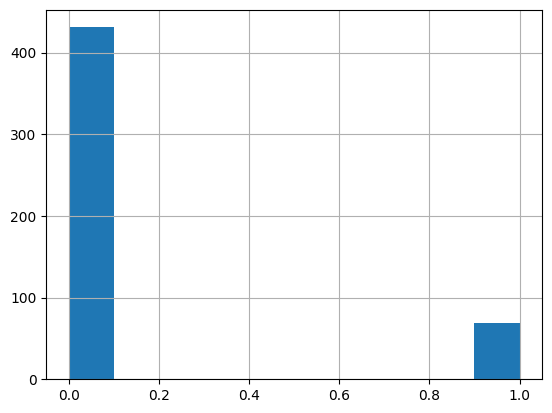

In [27]:
df['pustynia'].hist()

In [21]:
target_column = 'pustynia'
remove_columns = ['lon', 'lat', 'Year', 'Month']
training_columns = [column for column in df.columns if column != target_column and column not in remove_columns]

In [22]:
X = df[training_columns]
y = df[target_column]

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LogisticRegression()

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


# Fit the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        83
           1       0.65      0.76      0.70        17

    accuracy                           0.89       100
   macro avg       0.80      0.84      0.82       100
weighted avg       0.90      0.89      0.89       100



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
2+2